# Library Importing

In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Dataset Importing, Variable Declaration

In [9]:
df = pd.read_excel ('dataset.xlsx')
X = df.iloc[:, -4 :-3].values
y = df.iloc[:, 5].values
y

array([2.29, 2.46, 2.26, 2.31, 2.29, 2.25, 2.25, 2.29, 2.28, 2.16, 2.19,
       2.21, 2.4 , 2.  , 2.16, 2.25, 2.21, 2.38, 2.39, 2.22, 2.21, 2.22,
       2.3 , 2.34, 2.26, 2.22, 2.31, 2.25, 2.32, 2.36, 2.13, 2.1 , 2.35,
       2.31, 2.21, 2.33, 2.35, 2.19, 2.1 , 2.25, 1.97, 2.22, 2.26, 2.34,
       2.29, 2.26, 2.22, 2.24, 2.32, 2.52, 2.11, 2.34, 2.1 , 2.19, 2.29,
       2.3 , 2.26, 2.38, 2.32, 2.22, 2.3 , 2.23, 2.22, 2.47, 2.19, 2.3 ,
       2.22, 2.28, 2.23, 1.99, 2.45, 2.3 , 2.27, 2.2 , 2.35, 2.37, 2.43,
       2.44, 2.  , 2.31, 2.36, 2.18, 2.49, 2.24, 2.25, 2.27, 2.27, 2.31,
       2.17, 2.39, 2.42, 2.18, 2.28, 2.31, 2.24, 2.23, 2.34, 2.31, 2.43,
       2.21, 2.29, 2.33, 2.32, 2.1 , 2.37, 2.26, 2.01, 2.37, 2.36, 2.34,
       2.41, 2.28, 2.26, 2.38, 2.16, 2.2 , 2.18, 2.22, 2.27, 2.34, 2.24,
       2.17, 2.27, 2.26, 2.19, 2.26, 2.21, 2.15, 2.38, 2.36, 2.27, 2.22,
       2.35, 2.45, 2.31, 2.34, 2.26, 2.3 , 2.33, 2.15, 2.38, 2.08, 2.29,
       2.28, 2.23, 2.06, 1.98, 2.25, 2.04, 2.12, 2.

In [49]:
df = df.drop(df.loc[:,'Unnamed: 0':'tensile'].head(0).columns, axis=1)
df = df.drop(columns=['sg', 'crack'])
df['Xy'] = df.elongation * df.bursting
df['X^2'] = df.elongation * df.elongation
df['y^2'] = df.bursting * df.bursting
df.loc['Total'] = df.sum(numeric_only=True, axis=0)
df

,elongation,bursting,Xy,X^2,y^2
0,427.0,2.29,977.83,182329.0,5.2441
1,483.0,2.46,1188.18,233289.0,6.0516
2,406.0,2.26,917.56,164836.0,5.1076
3,408.0,2.31,942.48,166464.0,5.3361
4,384.0,2.29,879.36,147456.0,5.2441
...,...,...,...,...,...
960,437.0,2.28,996.36,190969.0,5.1984
961,338.0,2.10,709.80,114244.0,4.4100
962,434.0,2.27,985.18,188356.0,5.1529
963,483.0,2.46,1188.18,233289.0,6.0516


In [52]:
#calculate intercept
((2177.43*155589710.0)-(385058.0*873672.70))/((964*155589710.0)-(385058.0*385058.0))

1.3794601891074139

In [53]:
#calculate coeff
((964*873672.70)-(385058.0*2177.43))/((964*155589710.0)-(385058.0*385058.0))

0.0022013057193993194

In [54]:
#calculate R2
a = ((964*873672.70)-(385058.0*2177.43))
b = ((964*155589710.0)-(385058.0*385058.0))
c = ((964*4928.9065)-(2177.43*2177.43))
(a*a)/(b*c)

0.8114359229805049

# Scatter Data Plotting

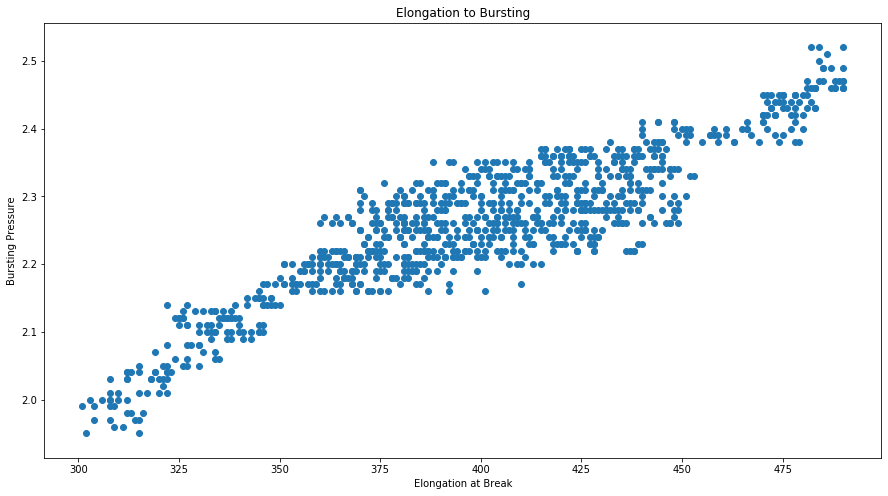

In [5]:
df1 = pd.DataFrame(df)
plt.figure(figsize=(15,8))
plt.scatter(df1.elongation, df1.bursting)
plt.xlabel("Elongation at Break")
plt.ylabel("Bursting Pressure")
plt.title("Elongation to Bursting")
plt.show()

# Train and Test Data Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Model Development (Using Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Training

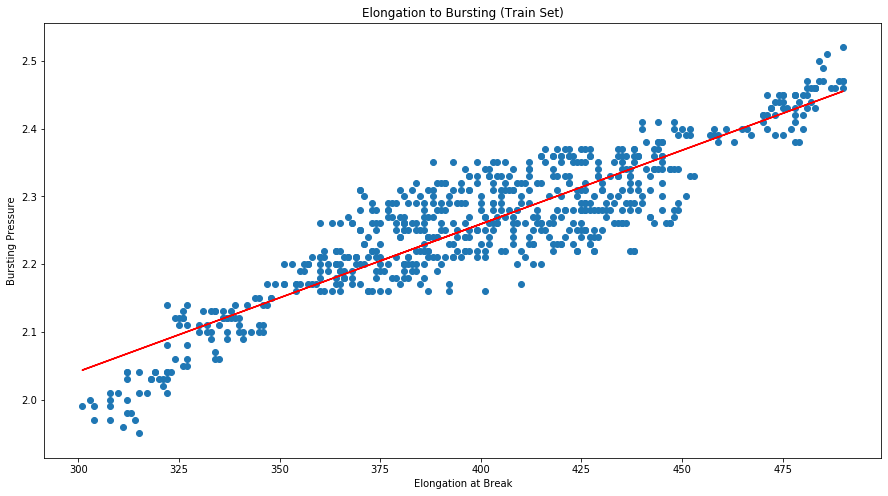

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Elongation to Bursting (Train Set)')
plt.xlabel("Elongation at Break")
plt.ylabel("Bursting Pressure")
plt.show()

# Model Testing

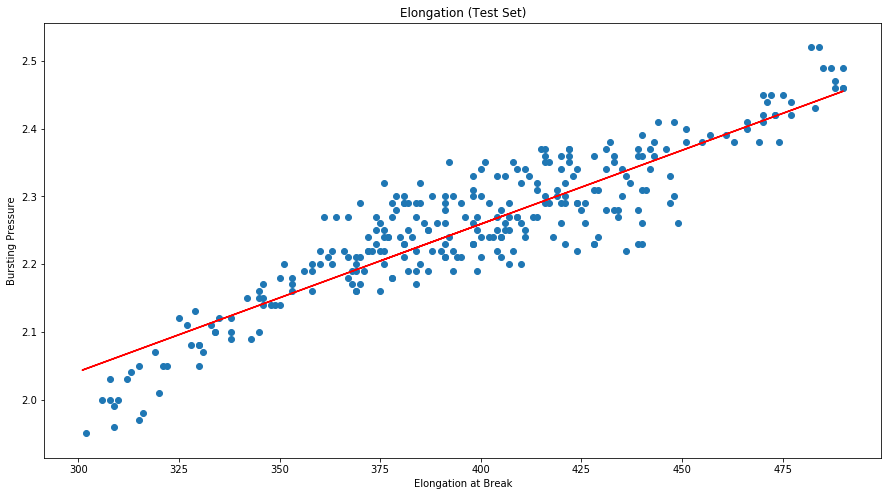

In [13]:
plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Elongation (Test Set)')
plt.xlabel("Elongation at Break")
plt.ylabel("Bursting Pressure")
plt.show()

# Model Testing Result

In [15]:
y_pred = regressor.predict(X_test)
#print(y_pred)

# Counting R2 Score

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8181052943940827

In [19]:
print(regressor.coef_)

[0.0021793]


In [20]:
print(regressor.intercept_)

1.3873789972592838


In [21]:
regressor.predict([[320]])

array([2.08475422])

In [22]:
0.0021793*320+1.3873789972592838

2.084754997259284